# GaussianNB

In [1]:
import some_load_train_evaluate_functions as ml

from sklearn.naive_bayes import GaussianNB

In [2]:
path = '../KG/db.env'

driver = ml.connect_to_neo4j(path)

Connected to database successfully.


### Load Data

In [3]:
# Diabetes data

diabetes_df = ml.get_data_of_disease(driver, 'Diabetes')
diabetes_df

,Respondent_ID,Gender,Age,BMI,25-hydroxyvitamin D2 + D3 [nmol/L],A/G Ratio,Alpha-carotene [umol/L],Alpha-crypotoxanthin [umol/L],Alpha-tocopherol [umol/L],Basophils [%],...,Ferritin [ng/mL],Gamma Glutamyl Transferase [IU/L],Hemoglobin [g/dL],Insulin [pmol/L],LDL-Cholesterol(NIH2) [mmol/L],Lactate Dehydrogenase [IU/L],Transferrin Saturation [%],Transferrin receptor [nmol/L],Triglyceride [mmol/L],Diabetes
0,93703,0,2,17.5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,93704,1,2,15.7,74.4,NaN,NaN,NaN,NaN,0.7,...,36.60,NaN,13.1,NaN,NaN,NaN,NaN,30.6,NaN,0
2,93705,0,66,31.7,89.9,1.517241,0.138,0.071,26.006,1.0,...,28.70,21.0,11.9,NaN,NaN,174.0,28.0,39.8,NaN,0
3,93706,1,18,21.5,53.8,1.629630,0.160,0.031,16.765,0.8,...,284.00,16.0,16.3,NaN,NaN,142.0,51.0,34.0,NaN,0
4,93707,1,13,18.1,58.2,1.857143,0.009,0.044,22.756,0.5,...,49.30,9.0,14.5,NaN,NaN,177.0,21.0,34.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8888,102952,0,70,20.0,82.7,1.846154,0.235,0.077,31.347,0.6,...,135.00,18.0,13.4,26.34,1.112,168.0,39.0,29.1,0.881,1
8889,102953,1,42,35.8,49.5,1.142857,0.106,0.080,21.873,0.6,...,120.00,28.0,15.5,NaN,NaN,136.0,20.0,28.6,NaN,0
8890,102954,0,41,26.1,50.5,1.500000,0.117,0.056,26.935,1.4,...,1.99,8.0,6.4,56.94,2.793,123.0,5.0,248.0,0.553,0
8891,102955,0,14,45.6,61.9,1.205882,0.031,0.079,17.856,0.9,...,11.40,16.0,11.4,NaN,NaN,158.0,5.0,57.7,NaN,0


In [4]:
gaussian_nb = GaussianNB()

## Preprocessing

### Zero Imputation

In [5]:
# Imputing null values with zeroes

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = diabetes_df, label = 'Diabetes',
                                                        impute = True, scale=True,
                                                        imputer=ml.SimpleImputer(strategy='constant',fill_value=0),
                                                        random_state=42)


Train Accuracy: 0.516

Test Accuracy: 0.516

Precision: 0.205

Recall: 0.888

F1-Score: 0.333

Confusion Matrix:

[[1406 1667]
 [  54  430]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.96      0.46      0.62      3073
     Class 1       0.21      0.89      0.33       484

    accuracy                           0.52      3557
   macro avg       0.58      0.67      0.48      3557
weighted avg       0.86      0.52      0.58      3557


ROC-AUC Curve:


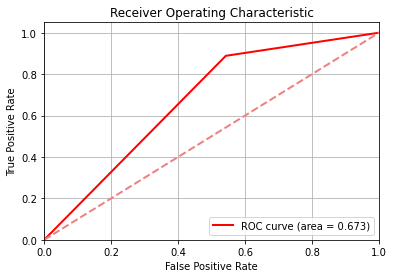

In [6]:
gaussian_nb.fit(X_train, y_train)

ml.evaluate_model_metrics(gaussian_nb,X_train,y_train,X_val,y_val)

### Mode Imputation

In [7]:
# Imputing with most frequent values

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = diabetes_df, label = 'Diabetes',
                                                              impute = True, scale=True,
                                                              imputer=ml.SimpleImputer(strategy='most_frequent'),
                                                              random_state=42)


Train Accuracy: 0.831

Test Accuracy: 0.831

Precision: 0.425

Recall: 0.682

F1-Score: 0.524

Confusion Matrix:

[[2627  446]
 [ 154  330]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.94      0.85      0.90      3073
     Class 1       0.43      0.68      0.52       484

    accuracy                           0.83      3557
   macro avg       0.68      0.77      0.71      3557
weighted avg       0.87      0.83      0.85      3557


ROC-AUC Curve:


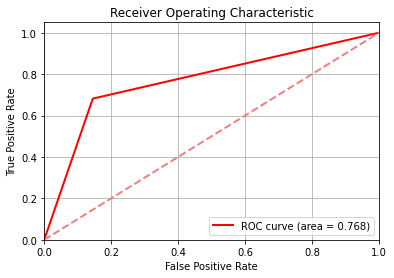

In [8]:
gaussian_nb.fit(X_train, y_train)

ml.evaluate_model_metrics(gaussian_nb,X_train,y_train,X_val,y_val)

### k-NN Imputation

In [9]:
# Imputing missing values with values from the k-nearest neighbors in the feature space

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = diabetes_df, label = 'Diabetes',
                                                              impute = True, scale=True,
                                                              imputer=ml.KNNImputer(n_neighbors=20),
                                                              random_state=42)


Train Accuracy: 0.820

Test Accuracy: 0.820

Precision: 0.407

Recall: 0.713

F1-Score: 0.518

Confusion Matrix:

[[2571  502]
 [ 139  345]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.95      0.84      0.89      3073
     Class 1       0.41      0.71      0.52       484

    accuracy                           0.82      3557
   macro avg       0.68      0.77      0.70      3557
weighted avg       0.88      0.82      0.84      3557


ROC-AUC Curve:


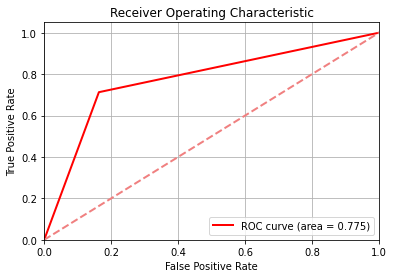

In [10]:
gaussian_nb.fit(X_train, y_train)

ml.evaluate_model_metrics(gaussian_nb,X_train,y_train,X_val,y_val)

### Multiple Imputation by Chained Equations (MICE)

In [11]:
# Imputes by looking at data from other columns and trying to estimate the best prediction for each missing value.

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = diabetes_df, label = 'Diabetes',
                                                              impute = True, scale=True,
                                                              imputer=ml.IterativeImputer(max_iter=20),
                                                              random_state=42)


Train Accuracy: 0.826

Test Accuracy: 0.824

Precision: 0.413

Recall: 0.700

F1-Score: 0.520

Confusion Matrix:

[[2592  481]
 [ 145  339]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.95      0.84      0.89      3073
     Class 1       0.41      0.70      0.52       484

    accuracy                           0.82      3557
   macro avg       0.68      0.77      0.71      3557
weighted avg       0.87      0.82      0.84      3557


ROC-AUC Curve:


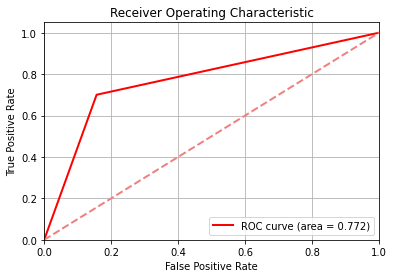

In [12]:
gaussian_nb.fit(X_train, y_train)

ml.evaluate_model_metrics(gaussian_nb,X_train,y_train,X_val,y_val)

### Median Imputation

In [13]:
# Imputing with median values

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = diabetes_df, label = 'Diabetes',
                                                              impute = True, scale=True,
                                                              imputer=ml.SimpleImputer(strategy='median'),
                                                              random_state=42)


Train Accuracy: 0.835

Test Accuracy: 0.833

Precision: 0.428

Recall: 0.676

F1-Score: 0.524

Confusion Matrix:

[[2636  437]
 [ 157  327]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.94      0.86      0.90      3073
     Class 1       0.43      0.68      0.52       484

    accuracy                           0.83      3557
   macro avg       0.69      0.77      0.71      3557
weighted avg       0.87      0.83      0.85      3557


ROC-AUC Curve:


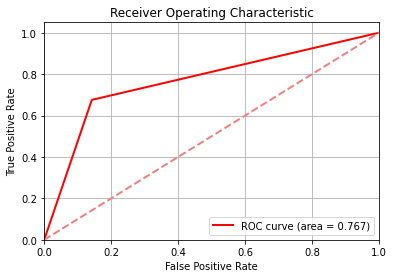

In [14]:
gaussian_nb.fit(X_train, y_train)

ml.evaluate_model_metrics(gaussian_nb,X_train,y_train,X_val,y_val)

### Mean Imputation

In [15]:
# Splitting and Preprocessing data

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = diabetes_df, label = 'Diabetes',
                                                              impute = True, scale=True,
                                                              imputer=ml.SimpleImputer(strategy='mean'),
                                                              random_state=42)


Train Accuracy: 0.836

Test Accuracy: 0.831

Precision: 0.421

Recall: 0.640

F1-Score: 0.508

Confusion Matrix:

[[2647  426]
 [ 174  310]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.94      0.86      0.90      3073
     Class 1       0.42      0.64      0.51       484

    accuracy                           0.83      3557
   macro avg       0.68      0.75      0.70      3557
weighted avg       0.87      0.83      0.85      3557


ROC-AUC Curve:


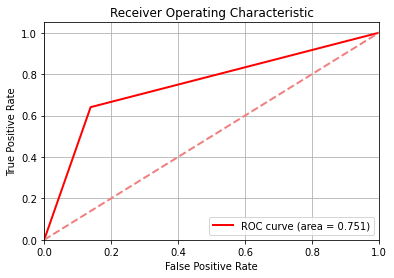

In [16]:
gaussian_nb.fit(X_train, y_train)

ml.evaluate_model_metrics(gaussian_nb,X_train,y_train,X_val,y_val)

### Dropping Null Values

In [17]:
# Drop null values
diabetes_df_na = diabetes_df.dropna()

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = diabetes_df_na, label = 'Diabetes',
                                                              impute = False, scale=True,
                                                              random_state=42)


Train Accuracy: 0.876

Test Accuracy: 0.887

Precision: 0.832

Recall: 0.798

F1-Score: 0.815

Confusion Matrix:

[[256  20]
 [ 25  99]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.91      0.93      0.92       276
     Class 1       0.83      0.80      0.81       124

    accuracy                           0.89       400
   macro avg       0.87      0.86      0.87       400
weighted avg       0.89      0.89      0.89       400


ROC-AUC Curve:


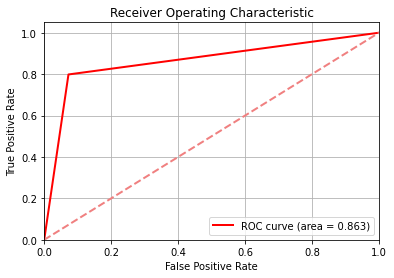

In [18]:
gaussian_nb.fit(X_train, y_train)

ml.evaluate_model_metrics(gaussian_nb,X_train,y_train,X_val,y_val)

## Oversampling and Undersampling

### Random Oversampling


Train Accuracy: 0.857

Test Accuracy: 0.868

Precision: 0.771

Recall: 0.815

F1-Score: 0.792

Confusion Matrix:

[[246  30]
 [ 23 101]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.91      0.89      0.90       276
     Class 1       0.77      0.81      0.79       124

    accuracy                           0.87       400
   macro avg       0.84      0.85      0.85       400
weighted avg       0.87      0.87      0.87       400


ROC-AUC Curve:


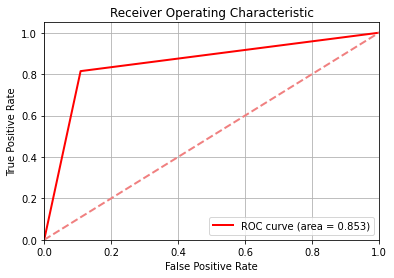

In [19]:
X_ros, y_ros = ml.random_over_sample(X_train, y_train)

gaussian_nb.fit(X_ros, y_ros)

ml.evaluate_model_metrics(gaussian_nb,X_ros, y_ros,X_val, y_val)

### SMOTE (Synthetic Minority Over-sampling Technique)


Train Accuracy: 0.825

Test Accuracy: 0.802

Precision: 0.640

Recall: 0.831

F1-Score: 0.723

Confusion Matrix:

[[218  58]
 [ 21 103]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.91      0.79      0.85       276
     Class 1       0.64      0.83      0.72       124

    accuracy                           0.80       400
   macro avg       0.78      0.81      0.78       400
weighted avg       0.83      0.80      0.81       400


ROC-AUC Curve:


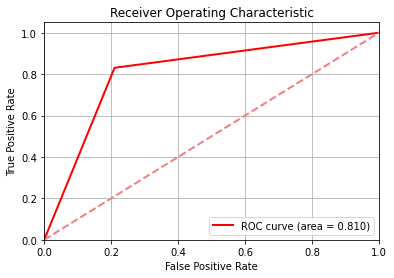

In [20]:
X_smote, y_smote = ml.smote_over_sample(X_train, y_train)

gaussian_nb.fit(X_smote, y_smote)

ml.evaluate_model_metrics(gaussian_nb,X_smote, y_smote,X_val, y_val)

### Random Undersampling


Train Accuracy: 0.877

Test Accuracy: 0.890

Precision: 0.817

Recall: 0.831

F1-Score: 0.824

Confusion Matrix:

[[253  23]
 [ 21 103]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.92      0.92      0.92       276
     Class 1       0.82      0.83      0.82       124

    accuracy                           0.89       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.89      0.89      0.89       400


ROC-AUC Curve:


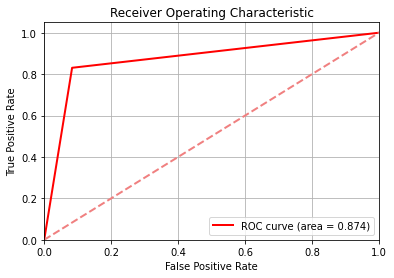

In [21]:
X_rus, y_rus = ml.random_under_sample(X_train, y_train)

gaussian_nb.fit(X_rus, y_rus)

ml.evaluate_model_metrics(gaussian_nb,X_rus, y_rus,X_val, y_val)

### Tomek Links


Train Accuracy: 0.880

Test Accuracy: 0.882

Precision: 0.813

Recall: 0.806

F1-Score: 0.810

Confusion Matrix:

[[253  23]
 [ 24 100]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.91      0.92      0.92       276
     Class 1       0.81      0.81      0.81       124

    accuracy                           0.88       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.88      0.88      0.88       400


ROC-AUC Curve:


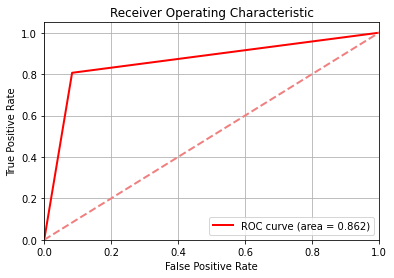

In [22]:
X_tomek, y_tomek = ml.tomek_links(X_train, y_train)

gaussian_nb.fit(X_tomek, y_tomek)

ml.evaluate_model_metrics(gaussian_nb,X_tomek, y_tomek,X_val, y_val)

### SMOTE + Tomek Links


Train Accuracy: 0.824

Test Accuracy: 0.805

Precision: 0.644

Recall: 0.831

F1-Score: 0.725

Confusion Matrix:

[[219  57]
 [ 21 103]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.91      0.79      0.85       276
     Class 1       0.64      0.83      0.73       124

    accuracy                           0.81       400
   macro avg       0.78      0.81      0.79       400
weighted avg       0.83      0.81      0.81       400


ROC-AUC Curve:


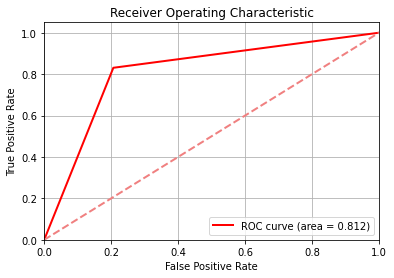

In [23]:
X_smote_tomek, y_smote_tomek = ml.smote_tomek(X_train, y_train)

gaussian_nb.fit(X_smote_tomek, y_smote_tomek)

ml.evaluate_model_metrics(gaussian_nb,X_smote_tomek, y_smote_tomek,X_val, y_val)

In [24]:
# Random Undersampling provides best results

X_train, y_train = X_rus, y_rus

## Hyperparameter Optimization 

### Grid Search

In [25]:
# Since GaussianNB is a very simple model, there aren't much hyperparamters to tune

param_grid = {
    
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]

}

In [26]:
grid_best_params, gaussian_nb_grid = ml.grid_search_optimize(gaussian_nb, param_grid, X_train, 
                                                                y_train, cv=10,scoring='accuracy')

In [27]:
grid_best_params

{'var_smoothing': 1e-09}


Train Accuracy: 0.877

Test Accuracy: 0.890

Precision: 0.817

Recall: 0.831

F1-Score: 0.824

Confusion Matrix:

[[253  23]
 [ 21 103]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.92      0.92      0.92       276
     Class 1       0.82      0.83      0.82       124

    accuracy                           0.89       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.89      0.89      0.89       400


ROC-AUC Curve:


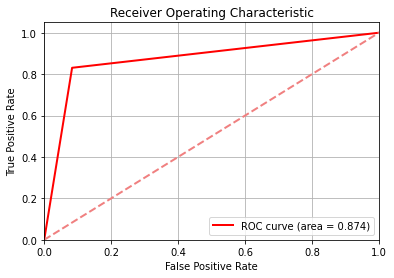

In [28]:
ml.evaluate_model_metrics(gaussian_nb_grid,X_train,y_train,X_val,y_val)

### Random Search

In [29]:
rand_best_params, gaussian_nb_rand = ml.random_search_optimize(gaussian_nb,param_grid,n_iter=100,cv=5,
                                                               X_train=X_train, y_train=y_train,
                                                               scoring='accuracy')

In [30]:
rand_best_params

{'var_smoothing': 1e-09}


Train Accuracy: 0.877

Test Accuracy: 0.890

Precision: 0.817

Recall: 0.831

F1-Score: 0.824

Confusion Matrix:

[[253  23]
 [ 21 103]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.92      0.92      0.92       276
     Class 1       0.82      0.83      0.82       124

    accuracy                           0.89       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.89      0.89      0.89       400


ROC-AUC Curve:


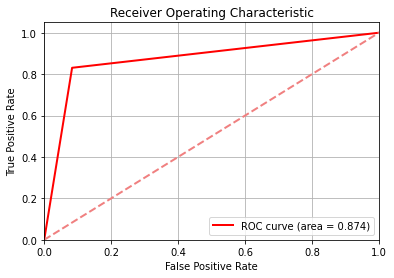

In [31]:
ml.evaluate_model_metrics(gaussian_nb_rand,X_train,y_train,X_val,y_val)

### Optuna

In [32]:
def objective(trial):

    var_smoothing = trial.suggest_loguniform('var_smoothing', 1e-10, 1e-1)

    model = GaussianNB(var_smoothing=var_smoothing)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = ml.accuracy_score(y_test, y_pred)

    return accuracy

In [33]:
best_trial , gaussian_nb_opt = ml.optuna_optimize(objective, GaussianNB, n_trials=150)

In [34]:
best_trial

{'var_smoothing': 1.300816550536411e-09}


Train Accuracy: 0.877

Test Accuracy: 0.890

Precision: 0.817

Recall: 0.831

F1-Score: 0.824

Confusion Matrix:

[[253  23]
 [ 21 103]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.92      0.92      0.92       276
     Class 1       0.82      0.83      0.82       124

    accuracy                           0.89       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.89      0.89      0.89       400


ROC-AUC Curve:


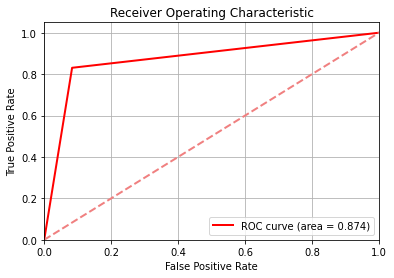

In [35]:
gaussian_nb_opt.fit(X_train,y_train)

ml.evaluate_model_metrics(gaussian_nb_opt,X_train,y_train,X_val,y_val)

## Cross Validation

### K-fold

In [36]:
ml.k_cross_validate(gaussian_nb,X,y,cv=10,scoring='accuracy')


accuracy scores: [0.82178218 0.9        0.87       0.81       0.84       0.84
 0.82       0.78       0.87       0.85      ]

Mean accuracy score:  0.8401782178217821

Standard deviation:  0.03275907723756455


In [37]:
ml.k_cross_validate(gaussian_nb_grid,X,y,cv=10,scoring='accuracy')


accuracy scores: [0.82178218 0.9        0.87       0.81       0.84       0.84
 0.82       0.78       0.87       0.85      ]

Mean accuracy score:  0.8401782178217821

Standard deviation:  0.03275907723756455


In [38]:
ml.k_cross_validate(gaussian_nb_opt,X,y,cv=10,scoring='accuracy')


accuracy scores: [0.82178218 0.9        0.87       0.81       0.84       0.84
 0.82       0.78       0.87       0.85      ]

Mean accuracy score:  0.8401782178217821

Standard deviation:  0.03275907723756455


### Stratified K-fold

In [39]:
ml.stratified_k_cross_validate(gaussian_nb,X,y,n_splits=10)


Average Accuracy: 0.845128712871287

Average Precision: 0.7930366847511785

Average Recall: 0.7328877005347594

Average F1-Score: 0.7578254493646985


In [40]:
ml.stratified_k_cross_validate(gaussian_nb_grid,X,y,n_splits=10)


Average Accuracy: 0.845128712871287

Average Precision: 0.7930366847511785

Average Recall: 0.7328877005347594

Average F1-Score: 0.7578254493646985


In [41]:
ml.stratified_k_cross_validate(gaussian_nb_opt,X,y,n_splits=10)


Average Accuracy: 0.845128712871287

Average Precision: 0.7930366847511785

Average Recall: 0.7328877005347594

Average F1-Score: 0.7578254493646985


## Feature Selection

### Correlation Analysis

In [42]:
gaussian_nb_test = GaussianNB()

In [43]:
pos_corr, neg_corr = ml.get_correlated_features(diabetes_df,'Diabetes',pos=0.1,neg=-0.1)

corr_features = ['Gender'] + list(pos_corr.keys()[1:10]) + list(neg_corr.keys()[:10]) 


Train Accuracy: 0.868

Test Accuracy: 0.900

Precision: 0.875

Recall: 0.790

F1-Score: 0.831

Confusion Matrix:

[[262  14]
 [ 26  98]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.91      0.95      0.93       276
     Class 1       0.88      0.79      0.83       124

    accuracy                           0.90       400
   macro avg       0.89      0.87      0.88       400
weighted avg       0.90      0.90      0.90       400


ROC-AUC Curve:


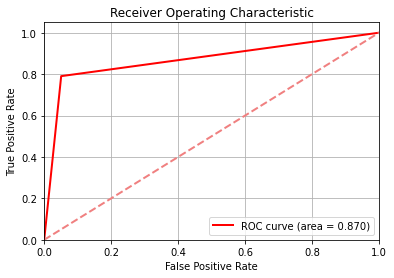

In [44]:
ml.evaluate_feature_set(corr_features, gaussian_nb_test, X_train, y_train, X_val, y_val)

### SelectFromModel

In [45]:
sfm_features = ml.select_from_model_features(ml.LogisticRegression(),X,y)
sfm_features

['Gender',
 'BMI',
 'A/G Ratio',
 'Basophils [%]',
 'Cis-beta-carotene [umol/L]',
 'Fasting Glucose [mmol/L]',
 'Glycohemoglobin [%]',
 'Iron [ug/dL]',
 'Iron frozen [umol/L]',
 'Mean cell volume [fL]',
 'Neutrophil_Lymphocyte Ratio',
 'Osmolality [mmol/Kg]',
 'Potassium [mmol/L]',
 'RBC count [million cells/uL]',
 'Retinol [umol/L]',
 'Retinyl palmitate [umol/L]',
 'Sodium [mmol/L]',
 'Systemic Immune‐inflammation Index (SII)',
 'Total Cholestrol_HDL Ratio',
 'Trans-beta-carotene [umol/L]',
 'Triglyceride_HDL Ratio',
 'Chloride [mmol/L]',
 'Hemoglobin [g/dL]',
 'LDL-Cholesterol(NIH2) [mmol/L]',
 'Transferrin Saturation [%]',
 'Triglyceride [mmol/L]']


Train Accuracy: 0.875

Test Accuracy: 0.887

Precision: 0.811

Recall: 0.831

F1-Score: 0.821

Confusion Matrix:

[[252  24]
 [ 21 103]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.92      0.91      0.92       276
     Class 1       0.81      0.83      0.82       124

    accuracy                           0.89       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.89      0.89      0.89       400


ROC-AUC Curve:


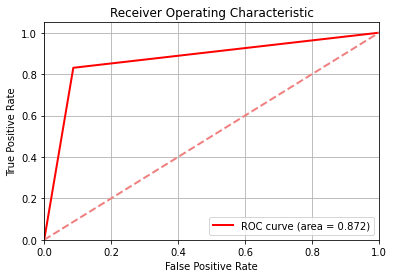

In [46]:
sfm_features = list(sfm_features)

ml.evaluate_feature_set(sfm_features, gaussian_nb_test, X_train, y_train, X_val, y_val)

### SelectKBest

In [47]:
k_best_features = ml.select_k_best(X, y, n=30)
k_best_features[:30]

array(['Glycohemoglobin [%]', 'Fasting Glucose [mmol/L]',
       'Osmolality [mmol/Kg]', 'Direct HDL-Cholesterol [mmol/L]',
       'Total Cholesterol [mmol/L]', 'Insulin [pmol/L]',
       'Blood Urea Nitrogen [mg/dL]', 'BMI',
       'LDL-Cholesterol(NIH2) [mmol/L]', 'Chloride [mmol/L]', 'Age',
       'Triglyceride_HDL Ratio', 'Platelet_WBC Ratio',
       'Triglyceride [mmol/L]', 'Non_HDL Ratio', 'Retinol [umol/L]',
       'Alpha-crypotoxanthin [umol/L]', 'Ferritin [ng/mL]',
       'Trans-beta-carotene [umol/L]', 'Cis-beta-carotene [umol/L]',
       'Transferrin Saturation [%]',
       'White blood cell count [1000 cells/uL]', 'UIBC [umol/L]',
       'Alanine Aminotransferase [U/L]', 'Total Lycopene [umol/L]',
       'Creatinine [mg/dL]', 'Iron frozen [umol/L]',
       'Trans-lycopene [umol/L]', 'Iron [ug/dL]',
       'Alpha-carotene [umol/L]'], dtype=object)


Train Accuracy: 0.877

Test Accuracy: 0.890

Precision: 0.833

Recall: 0.806

F1-Score: 0.820

Confusion Matrix:

[[256  20]
 [ 24 100]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.91      0.93      0.92       276
     Class 1       0.83      0.81      0.82       124

    accuracy                           0.89       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.89      0.89      0.89       400


ROC-AUC Curve:


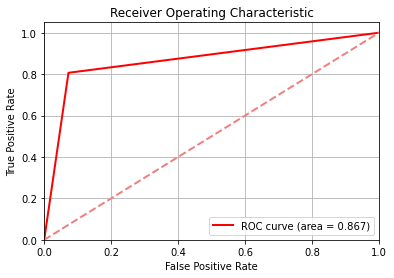

In [48]:
k_best_features_ = list(k_best_features[:30]) + ['Gender']

ml.evaluate_feature_set(k_best_features_, gaussian_nb_test, X_train, y_train, X_val, y_val)

### Recursive Feature Elimination (RFE) 

In [49]:
rfe_features = ml.select_rfe_features(ml.LogisticRegression(),X,y,n=0.3,step=0.5)
rfe_features[:30]

array(['Gender', 'Iron [ug/dL]', 'Iron frozen [umol/L]',
       'Mean cell volume [fL]', 'Neutrophil_Lymphocyte Ratio',
       'Osmolality [mmol/Kg]', 'Potassium [mmol/L]',
       'RBC count [million cells/uL]', 'Retinol [umol/L]',
       'Glycohemoglobin [%]', 'Retinyl palmitate [umol/L]',
       'Systemic Immune‐inflammation Index (SII)',
       'Trans-beta-carotene [umol/L]', 'Triglyceride_HDL Ratio',
       'Hemoglobin [g/dL]', 'Insulin [pmol/L]',
       'LDL-Cholesterol(NIH2) [mmol/L]', 'Lactate Dehydrogenase [IU/L]',
       'Transferrin Saturation [%]', 'Sodium [mmol/L]',
       'Fasting Glucose [mmol/L]', 'Triglyceride [mmol/L]',
       'Basophils [%]', 'BMI', 'A/G Ratio', 'Cis-beta-carotene [umol/L]',
       'Beta-cryptoxanthin [umol/L]', 'Total Protein [g/dL]',
       'UIBC [umol/L]', 'Uric Acid [mg/dL]'], dtype=object)


Train Accuracy: 0.879

Test Accuracy: 0.905

Precision: 0.858

Recall: 0.831

F1-Score: 0.844

Confusion Matrix:

[[259  17]
 [ 21 103]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.93      0.94      0.93       276
     Class 1       0.86      0.83      0.84       124

    accuracy                           0.91       400
   macro avg       0.89      0.88      0.89       400
weighted avg       0.90      0.91      0.90       400


ROC-AUC Curve:


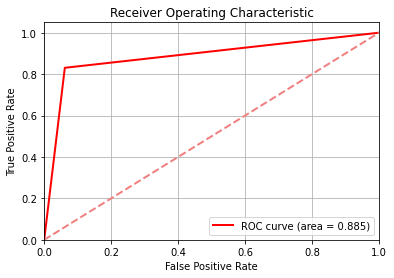

In [50]:
rfe_features_ = list(rfe_features[:30])

ml.evaluate_feature_set(rfe_features_, gaussian_nb_test, X_train, y_train, X_val, y_val)

### Lasso Regularization

In [51]:
l1_selected_features = ml.log_reg_lasso_select(X_train, y_train)
l1_selected_features[:30]

['Glycohemoglobin [%]',
 'Fasting Glucose [mmol/L]',
 'Osmolality [mmol/Kg]',
 'Gender',
 'Platelet count [1000 cells/uL]',
 'BMI',
 'Neutrophil_Lymphocyte Ratio',
 'Potassium [mmol/L]',
 'Retinyl palmitate [umol/L]',
 'Basophils [%]',
 'Bicarbonate [mmol/L]',
 'Blood Urea Nitrogen [mg/dL]',
 'Hydroxycotinine [ng/mL]',
 'C-Reactive Protein [mg/L]',
 'Beta-cryptoxanthin [umol/L]',
 'Uric Acid [mg/dL]',
 'Sodium [mmol/L]',
 'Mean cell volume [fL]',
 'Lactate Dehydrogenase [IU/L]',
 'Insulin [pmol/L]',
 'Ferritin [ng/mL]',
 'Cis-beta-carotene [umol/L]',
 'Lymphocyte_Monocyte Ratio',
 'Trans-lycopene [umol/L]',
 'Blood cadmium [nmol/L]',
 'Creatinine [mg/dL]',
 'Albumin [g/dL]',
 'Triglyceride_HDL Ratio',
 'Creatine Phosphokinase [IU/L]',
 'Retinol [umol/L]']


Train Accuracy: 0.874

Test Accuracy: 0.887

Precision: 0.832

Recall: 0.798

F1-Score: 0.815

Confusion Matrix:

[[256  20]
 [ 25  99]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.91      0.93      0.92       276
     Class 1       0.83      0.80      0.81       124

    accuracy                           0.89       400
   macro avg       0.87      0.86      0.87       400
weighted avg       0.89      0.89      0.89       400


ROC-AUC Curve:


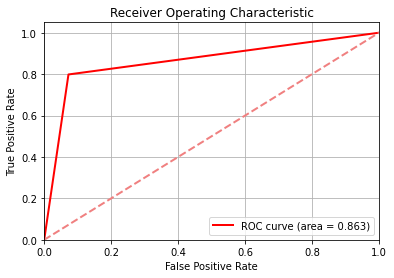

In [52]:
l1_selected_features_ = list(l1_selected_features[:30]) 

ml.evaluate_feature_set(l1_selected_features_, gaussian_nb_test, X_train, y_train, X_val, y_val)

### Relief F

In [53]:
relieff_features = ml.relief_feature_select(30,X,y)

In [54]:
relieff_features_ = relieff_features[:30]
relieff_features_

['Glycohemoglobin [%]',
 'Fasting Glucose [mmol/L]',
 'Total Cholesterol [mmol/L]',
 'LDL-Cholesterol(NIH2) [mmol/L]',
 'Triglyceride_HDL Ratio',
 'BMI',
 'Blood Urea Nitrogen [mg/dL]',
 'Nucleated RBCs',
 'Non_HDL Ratio',
 'Triglyceride [mmol/L]',
 'Age',
 'Osmolality [mmol/Kg]',
 'Insulin [pmol/L]',
 'Direct HDL-Cholesterol [mmol/L]',
 'Hemoglobin [g/dL]',
 'Hematocrit [%]',
 'RBC count [million cells/uL]',
 'Retinol [umol/L]',
 'Chloride [mmol/L]',
 'LDL_HDL Ratio',
 'Alanine Aminotransferase [U/L]',
 'Total Cholestrol_HDL Ratio',
 'UIBC [umol/L]',
 'Gender',
 'Alpha-tocopherol [umol/L]',
 'Uric Acid [mg/dL]',
 'Total Calcium [mg/dL]',
 '25-hydroxyvitamin D2 + D3 [nmol/L]',
 'Aspartate Aminotransferase [U/L]',
 'Ferritin [ng/mL]']


Train Accuracy: 0.858

Test Accuracy: 0.895

Precision: 0.873

Recall: 0.774

F1-Score: 0.821

Confusion Matrix:

[[262  14]
 [ 28  96]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.90      0.95      0.93       276
     Class 1       0.87      0.77      0.82       124

    accuracy                           0.90       400
   macro avg       0.89      0.86      0.87       400
weighted avg       0.89      0.90      0.89       400


ROC-AUC Curve:


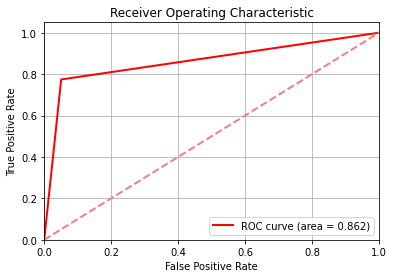

In [55]:
relieff_features_list = list(relieff_features_)

ml.evaluate_feature_set(relieff_features_list, gaussian_nb_test, X_train, y_train, X_val, y_val)

### Ensemble of Feature Sets

In [56]:
# We can also create a feature set from the above sets by selecting commonly occuring features

list1 = list(corr_features)
list2 = list(k_best_features_)
list3 = list(sfm_features)
list4 = list(rfe_features_)
list5 = list(l1_selected_features_)
list6 = list(relieff_features_)

combined_list = list1 + list2 + list3 + list4 + list5 + list6
feature_counts = ml.Counter(combined_list)
min_count = 3

combined_features = [feature for feature, count in feature_counts.items() if count >= min_count]
# combined_features = [x for x in relieff_features if x in combined_features]     # order based on releif features
combined_features

['Gender',
 'Glycohemoglobin [%]',
 'Fasting Glucose [mmol/L]',
 'Age',
 'BMI',
 'Blood Urea Nitrogen [mg/dL]',
 'Insulin [pmol/L]',
 'Osmolality [mmol/Kg]',
 'Retinol [umol/L]',
 'Triglyceride [mmol/L]',
 'Trans-lycopene [umol/L]',
 'A/G Ratio',
 'Chloride [mmol/L]',
 'Direct HDL-Cholesterol [mmol/L]',
 'LDL-Cholesterol(NIH2) [mmol/L]',
 'Triglyceride_HDL Ratio',
 'Ferritin [ng/mL]',
 'Trans-beta-carotene [umol/L]',
 'Cis-beta-carotene [umol/L]',
 'Transferrin Saturation [%]',
 'UIBC [umol/L]',
 'Iron frozen [umol/L]',
 'Iron [ug/dL]',
 'Basophils [%]',
 'Mean cell volume [fL]',
 'Neutrophil_Lymphocyte Ratio',
 'Potassium [mmol/L]',
 'RBC count [million cells/uL]',
 'Retinyl palmitate [umol/L]',
 'Sodium [mmol/L]',
 'Hemoglobin [g/dL]',
 'Uric Acid [mg/dL]']


Train Accuracy: 0.870

Test Accuracy: 0.877

Precision: 0.810

Recall: 0.790

F1-Score: 0.800

Confusion Matrix:

[[253  23]
 [ 26  98]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.91      0.92      0.91       276
     Class 1       0.81      0.79      0.80       124

    accuracy                           0.88       400
   macro avg       0.86      0.85      0.86       400
weighted avg       0.88      0.88      0.88       400


ROC-AUC Curve:


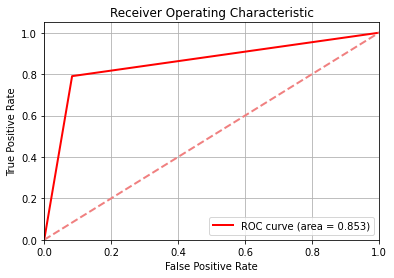

In [57]:
ml.evaluate_feature_set(combined_features, gaussian_nb_test, X_train, y_train, X_val, y_val)


Maximum accuracy = 0.9021 for 7 features


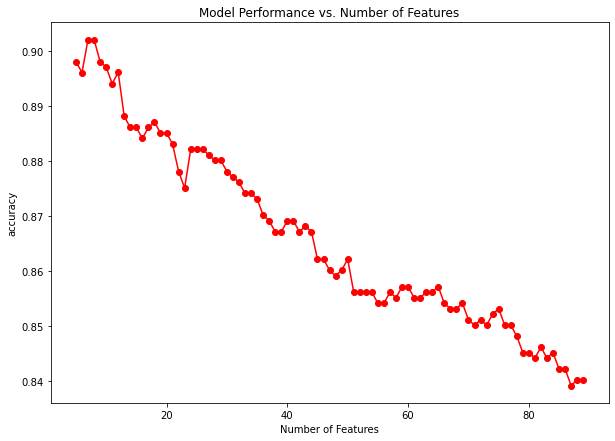

In [58]:
# Optimal no. of features

final_features = list(relieff_features) 

ml.plot_num_feature_performance(gaussian_nb_test,  X, y, final_features, scoring='accuracy')


Maximum f1 = 0.8361 for 7 features


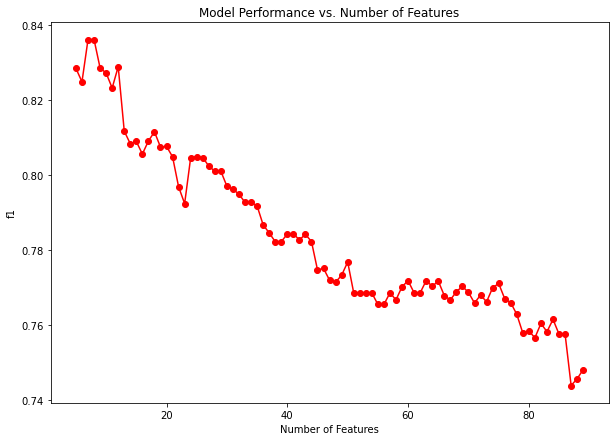

In [59]:
# Optimal no. of features

final_features = list(relieff_features) 

ml.plot_num_feature_performance(gaussian_nb_test,  X, y, final_features, scoring='f1')


Maximum precision = 0.9458 for 7 features


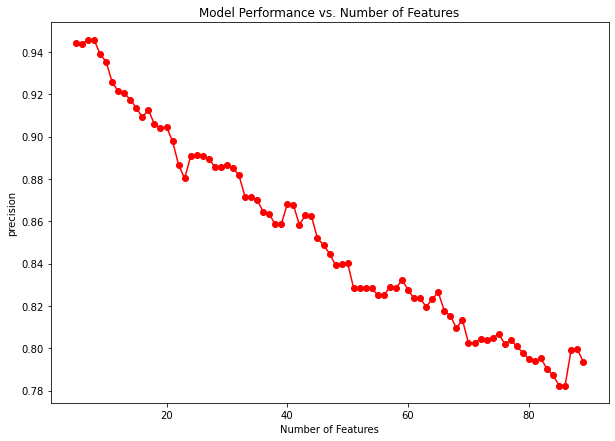

In [60]:
# Optimal no. of features

final_features = list(relieff_features) 

ml.plot_num_feature_performance(gaussian_nb_test,  X, y, final_features, scoring='precision')


Train Accuracy: 0.883

Test Accuracy: 0.900

Precision: 0.915

Recall: 0.781

F1-Score: 0.843

Confusion Matrix:

[[253  10]
 [ 30 107]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.89      0.96      0.93       263
     Class 1       0.91      0.78      0.84       137

    accuracy                           0.90       400
   macro avg       0.90      0.87      0.88       400
weighted avg       0.90      0.90      0.90       400


ROC-AUC Curve:


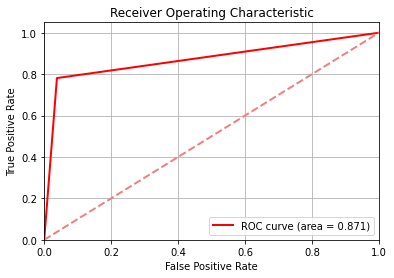

In [61]:
selected = relieff_features[:7]

X = X[selected]
X_train = X_train[selected]
X_test = X_test[selected]

gaussian_nb.fit(X_train, y_train)

ml.evaluate_model_metrics(gaussian_nb, X_train, y_train, X_test, y_test)

In [62]:
grid_best_params, gaussian_nb_grid = ml.grid_search_optimize(gaussian_nb, param_grid, X_train, y_train, cv=10)
grid_best_params

{'var_smoothing': 1e-09}


Train Accuracy: 0.883

Test Accuracy: 0.900

Precision: 0.915

Recall: 0.781

F1-Score: 0.843

Confusion Matrix:

[[253  10]
 [ 30 107]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.89      0.96      0.93       263
     Class 1       0.91      0.78      0.84       137

    accuracy                           0.90       400
   macro avg       0.90      0.87      0.88       400
weighted avg       0.90      0.90      0.90       400


ROC-AUC Curve:


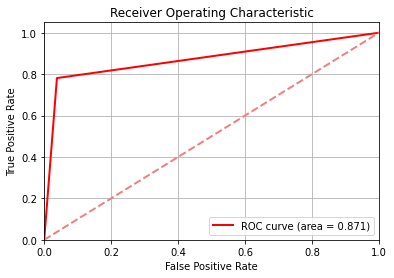

In [63]:
gaussian_nb_grid.fit(X_train, y_train)

ml.evaluate_model_metrics(gaussian_nb_grid,X_train,y_train,X_test,y_test)

In [64]:
# Hyperparameter Optimize

best_trial, gaussian_nb_opt = ml.optuna_optimize(objective,GaussianNB, n_trials=200)

best_trial

{'var_smoothing': 0.003766052499936064}


Train Accuracy: 0.887

Test Accuracy: 0.902

Precision: 0.922

Recall: 0.781

F1-Score: 0.846

Confusion Matrix:

[[254   9]
 [ 30 107]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.89      0.97      0.93       263
     Class 1       0.92      0.78      0.85       137

    accuracy                           0.90       400
   macro avg       0.91      0.87      0.89       400
weighted avg       0.90      0.90      0.90       400


ROC-AUC Curve:


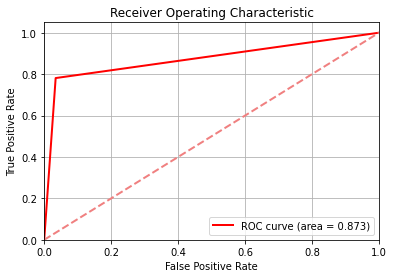

In [65]:
gaussian_nb_opt.fit(X_train, y_train)

ml.evaluate_model_metrics(gaussian_nb_opt,X_train,y_train,X_test,y_test)

In [66]:
# Cross-validation

ml.k_cross_validate(gaussian_nb,X,y,cv=10,scoring='accuracy')


accuracy scores: [0.92079208 0.94       0.9        0.9        0.91       0.91
 0.9        0.88       0.88       0.88      ]

Mean accuracy score:  0.9020792079207922

Standard deviation:  0.018409452740398353


In [67]:
ml.stratified_k_cross_validate(gaussian_nb,X,y,n_splits=10,random_state=42)


Average Accuracy: 0.901069306930693

Average Precision: 0.9406881394467602

Average Recall: 0.7508021390374331

Average F1-Score: 0.8333270420184625


In [68]:
ml.k_cross_validate(gaussian_nb_grid,X,y,cv=10,scoring='accuracy')


accuracy scores: [0.92079208 0.94       0.9        0.9        0.91       0.91
 0.9        0.88       0.88       0.88      ]

Mean accuracy score:  0.9020792079207922

Standard deviation:  0.018409452740398353


In [69]:
ml.stratified_k_cross_validate(gaussian_nb_grid,X,y,n_splits=10,random_state=42)


Average Accuracy: 0.901069306930693

Average Precision: 0.9406881394467602

Average Recall: 0.7508021390374331

Average F1-Score: 0.8333270420184625


In [70]:
ml.k_cross_validate(gaussian_nb_opt,X,y,cv=10,scoring='accuracy')


accuracy scores: [0.92079208 0.94       0.89       0.9        0.91       0.89
 0.9        0.86       0.88       0.88      ]

Mean accuracy score:  0.8970792079207921

Standard deviation:  0.021556902129222583


In [71]:
ml.stratified_k_cross_validate(gaussian_nb_opt,X,y,n_splits=10,random_state=42)


Average Accuracy: 0.894069306930693

Average Precision: 0.9394062565786703

Average Recall: 0.7297682709447416

Average F1-Score: 0.8198973712091092


In [72]:
final_gaussian_nb_estimator = gaussian_nb_grid

In [74]:
# Saving the model

estimator_name = 'GaussianNB'

ml.save_model(final_gaussian_nb_estimator, f"../Models/Diabetes/{estimator_name}.pkl")

Saved Model
